In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
import os
os.environ['KAGGLE_USERNAME'] = 'lalloo'
os.environ['KAGGLE_KEY'] = '0ab12fe085708624e156b49dc75a2022'

In [17]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 202M/207M [00:02<00:00, 52.9MB/s]
100% 207M/207M [00:02<00:00, 86.5MB/s]


In [18]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [32]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

In [33]:
train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [34]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:8])

['0803.jpg', '1574.jpg', '1527.jpg', '0063.jpg', '0737.jpg', '1137.jpg', '1645.jpg', '0558.jpg']


In [35]:
train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:8])

['43.jpg', '112.jpg', '125.jpg', '261.jpg', '111.jpg', '179.jpg', '11.jpg', '324.jpg']


In [36]:
import matplotlib.image as mpimg

In [41]:
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic= []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merge_pic = mask_pic + nomask_pic

['/content/New Masks Dataset/Train/Mask/0803.jpg', '/content/New Masks Dataset/Train/Mask/1574.jpg', '/content/New Masks Dataset/Train/Mask/1527.jpg', '/content/New Masks Dataset/Train/Mask/0063.jpg', '/content/New Masks Dataset/Train/Mask/0737.jpg', '/content/New Masks Dataset/Train/Mask/1137.jpg', '/content/New Masks Dataset/Train/Mask/1645.jpg', '/content/New Masks Dataset/Train/Mask/0558.jpg']
['/content/New Masks Dataset/Train/Non Mask/43.jpg', '/content/New Masks Dataset/Train/Non Mask/112.jpg', '/content/New Masks Dataset/Train/Non Mask/125.jpg', '/content/New Masks Dataset/Train/Non Mask/261.jpg', '/content/New Masks Dataset/Train/Non Mask/111.jpg', '/content/New Masks Dataset/Train/Non Mask/179.jpg', '/content/New Masks Dataset/Train/Non Mask/11.jpg', '/content/New Masks Dataset/Train/Non Mask/324.jpg']


<Figure size 864x864 with 0 Axes>

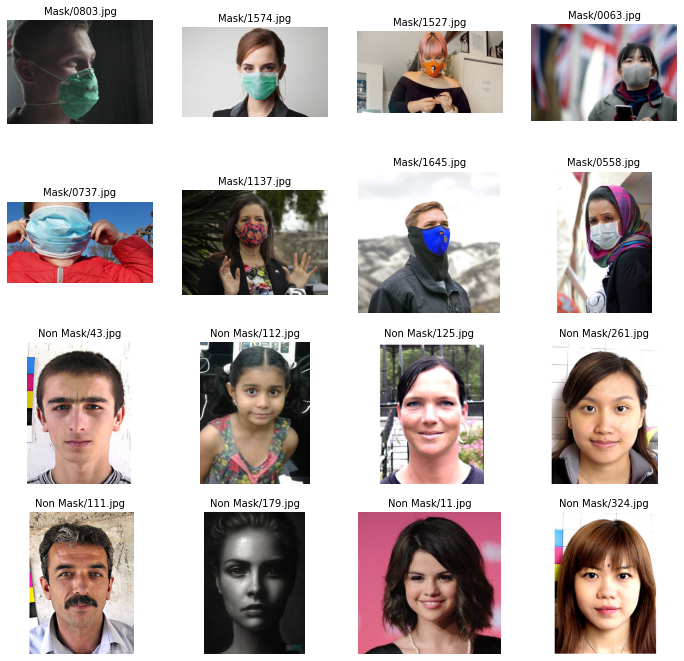

In [60]:
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

for i in range ( 0, len(merge_pic)):
  data = merge_pic[i].split('/',4)[4]
  sp = plt.subplot(4,4, i+1)
  sp.axis('Off')
  sp.set_title(data, fontsize=10)
  image = mpimg.imread(merge_pic[i])

  plt.imshow(image, cmap='gray')

In [49]:
print(merge_pic[2].split('/',4)[4])

Mask/1527.jpg


In [70]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [71]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [72]:
train_generator.image_shape

(150, 150, 3)

In [73]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [74]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
history = model.fit(test_generator, 
                    epochs=30, 
                    validation_data= validation_generator)

Epoch 1/30
4/4 [==============================] - 11s 3s/step - loss: 10.2951 - accuracy: 0.4400 - val_loss: 2.2888 - val_accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 11s 3s/step - loss: 4.8410 - accuracy: 0.5300 - val_loss: 0.6759 - val_accuracy: 0.6503
Epoch 3/30
4/4 [==============================] - 11s 3s/step - loss: 0.9552 - accuracy: 0.6400 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 4/30
4/4 [==============================] - 11s 3s/step - loss: 1.0811 - accuracy: 0.4900 - val_loss: 0.6898 - val_accuracy: 0.5686
Epoch 5/30
4/4 [==============================] - 12s 3s/step - loss: 0.6694 - accuracy: 0.6000 - val_loss: 0.6919 - val_accuracy: 0.4967
Epoch 6/30
4/4 [==============================] - 11s 3s/step - loss: 0.6595 - accuracy: 0.6400 - val_loss: 0.6914 - val_accuracy: 0.6242
Epoch 7/30
4/4 [==============================] - 12s 3s/step - loss: 0.6373 - accuracy: 0.6400 - val_loss: 0.6881 - val_accuracy: 0.6601
Epoch 8/30
4/4 [=================

In [76]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

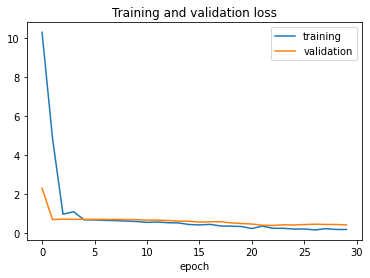

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

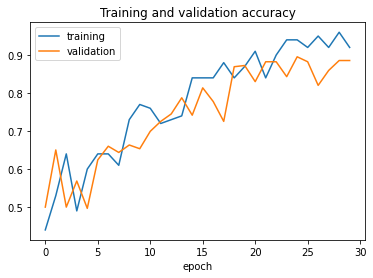

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [80]:
test_loss, test_val = model.evaluate(test_generator)

4/4 [==============================] - 1s 337ms/step - loss: 0.2889 - accuracy: 0.9800


In [87]:
print("test loss",test_loss," test val", test_val)

test loss 0.28887227177619934  test val 0.9800000190734863


In [91]:
from google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fname in uploaded.keys():
  image_pathname = '/content/'+fname
  img = image.load_img(image_pathname, target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction ==0:
    print("This person is WEARING A Mask")
  else:
    print('This person has NO mask')




Saving images.jpg to images.jpg
images.jpg
This person has NO mask
